# Image Comparison based on Texture Features

GLCM Texture Value difference with respect to 2 angles and 3 distances

Contrast Difference:
With 0,90 degree with Distance 1: 391.0679236484759 , 793.6314823874795
With 0,90 degree with Distance 3: 714.5121178167822 , 1084.6332691244954
With 0,90 degree with Distance 5: 629.6550018490984 , 990.1749953772119

Dissimilarity Difference:
With 0,90 degree with Distance 1: 9.199467190557627 , 14.7939319349316
With 0,90 degree with Distance 3: 11.998188850687166 , 16.647497390716854
With 0,90 degree with Distance 5: 10.8267612795856 , 15.37280417899404

Homogeneity Difference:
With 0,90 degree with Distance 1: -0.07630298582692191 , -0.12557369946271388
With 0,90 degree with Distance 3: -0.05467392455097342 , -0.0946443501731615
With 0,90 degree with Distance 5: -0.04709854281213313 , -0.07528843292197891

Energy Difference:
With 0,90 degree with Distance 1: -0.004892459321135101 , -0.004892459321135101
With 0,90 degree with Distance 3: -0.0015289514162878 , -0.003746614915203462
With 0,90 d

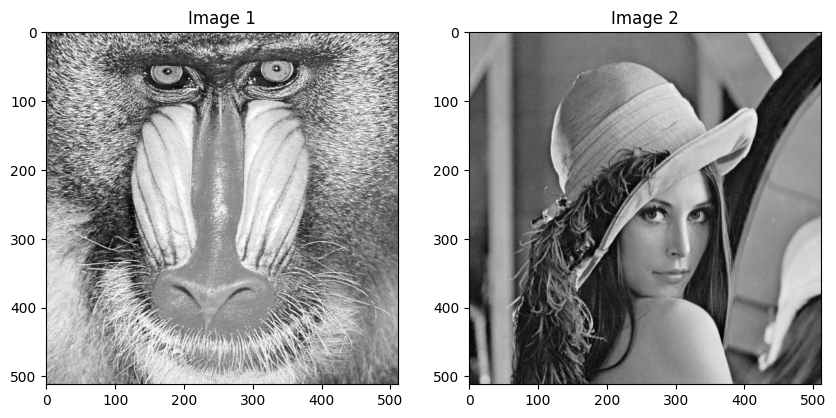

In [ ]:
#Using GLCM texture features
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Standard Images/mandril_color.tif')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)

image2=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Standard Images/lena_color_512.tif')
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)


fig=plt.figure(figsize=(10,10))
fig.add_subplot(121)
plt.imshow(image1,cmap="gray")
plt.title("Image 1")

fig.add_subplot(122)
plt.imshow(image2,cmap="gray")
plt.title("Image 2")

#finding the GLCM values for 2 distances and 2 angles
distance=[1,3,5]
angles=[0, np.pi/2]

glcm1=graycomatrix(image1,distance,angles,256,[0,256])
glcm2=graycomatrix(image2,distance,angles,256,[0,256])

#difference in GLCM values:
contrast=graycoprops(glcm1, 'contrast') - graycoprops(glcm2, 'contrast')
dissimilarity=graycoprops(glcm1, 'dissimilarity') - graycoprops(glcm2, 'dissimilarity')
homogeneity=graycoprops(glcm1, 'homogeneity') - graycoprops(glcm2, 'homogeneity')
energy=graycoprops(glcm1, 'energy') - graycoprops(glcm2, 'energy')
correlation=graycoprops(glcm1, 'correlation') - graycoprops(glcm2, 'correlation')
#print(graycoprops(glcm1, 'contrast'),",",graycoprops(glcm2, 'contrast'))
print("GLCM Texture Value difference with respect to 2 angles and 3 distances")
print("")

print("Contrast Difference:")
print("With 0,90 degree with Distance 1:",contrast[0][0],",",contrast[0][1])
print("With 0,90 degree with Distance 3:",contrast[1][0],",",contrast[1][1])
print("With 0,90 degree with Distance 5:",contrast[2][0],",",contrast[2][1])
print("")

print("Dissimilarity Difference:")
print("With 0,90 degree with Distance 1:",dissimilarity[0][0],",",dissimilarity[0][1])
print("With 0,90 degree with Distance 3:",dissimilarity[1][0],",",dissimilarity[1][1])
print("With 0,90 degree with Distance 5:",dissimilarity[2][0],",",dissimilarity[2][1])
print("")

print("Homogeneity Difference:")
print("With 0,90 degree with Distance 1:",homogeneity[0][0],",",homogeneity[0][1])
print("With 0,90 degree with Distance 3:",homogeneity[1][0],",",homogeneity[1][1])
print("With 0,90 degree with Distance 5:",homogeneity[2][0],",",homogeneity[2][1])
print("")

print("Energy Difference:")
print("With 0,90 degree with Distance 1:",energy[0][1],",",energy[0][1])
print("With 0,90 degree with Distance 3:",energy[1][0],",",energy[1][1])
print("With 0,90 degree with Distance 5:",energy[2][0],",",energy[2][1])
print("")

print("Correlation Difference:")
print("With 0,90 degree with Distance 1:",correlation[0][0],",",correlation[0][1])
print("With 0,90 degree with Distance 3:",correlation[1][0],",",correlation[1][1])
print("With 0,90 degree with Distance 5:",correlation[2][0],",",correlation[2][1])
print("")

In [ ]:
def salt_and_pepper_noise(image, percentage):
  size=image.size
  #setting the noise size, with percentage * size
  noise_size=int(percentage * size)
  #selecting indices for adding noise
  random_indices=np.random.choice(size,noise_size)
  noisy_image=image.copy()
  noise=np.random.choice([image.min(),image.max()], noise_size)
  noisy_image.flat[random_indices]=noise
  return noisy_image

noisy_image1=salt_and_pepper_noise(image1,0.3)

cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/Standard Images/mandril_color_noisy.tif",noisy_image1)

True